In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('archive.zip', 'r')
zip_ref.extractall('C:\Users\Utkarsh Barapatre\Desktop')
zip_ref.close()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2871768672.py, line 3)

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]


        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
len(paths)

2800

In [7]:
paths[:5]

['archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [8]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [9]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,archive\TESS Toronto emotional speech set data...,angry
1,archive\TESS Toronto emotional speech set data...,angry
2,archive\TESS Toronto emotional speech set data...,angry
3,archive\TESS Toronto emotional speech set data...,angry
4,archive\TESS Toronto emotional speech set data...,angry


In [10]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

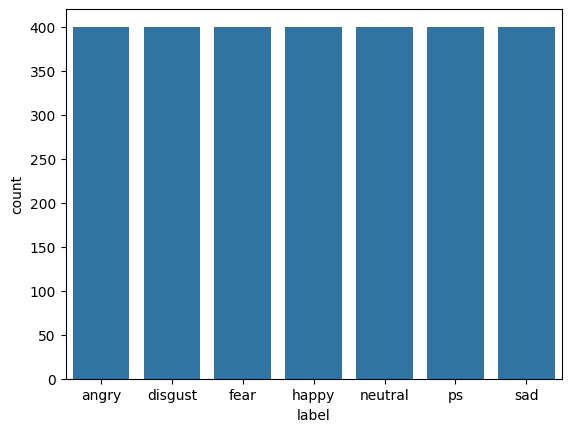

In [11]:
sns.countplot(data=df, x='label')

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

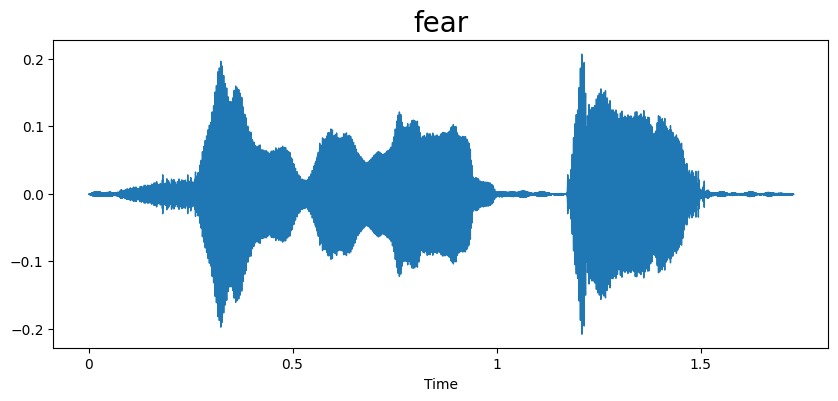

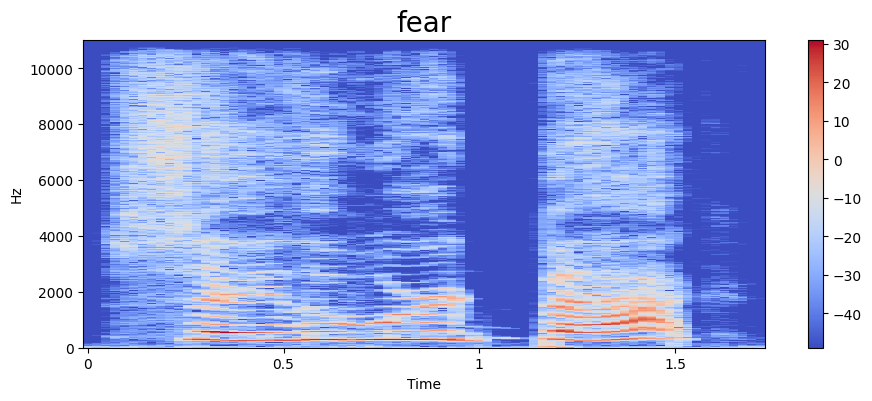

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


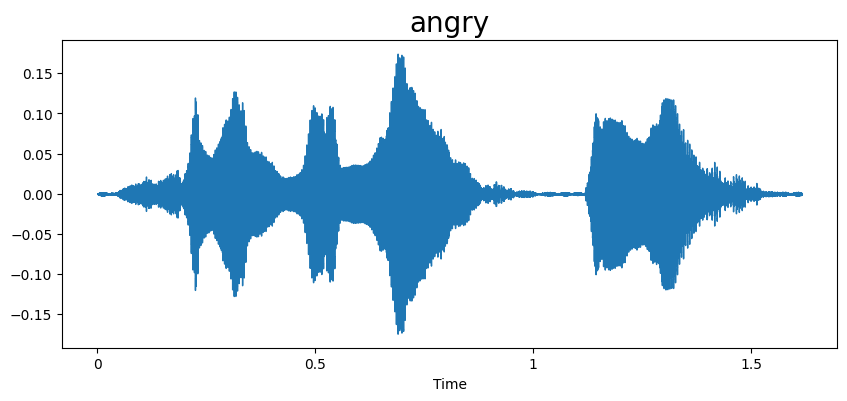

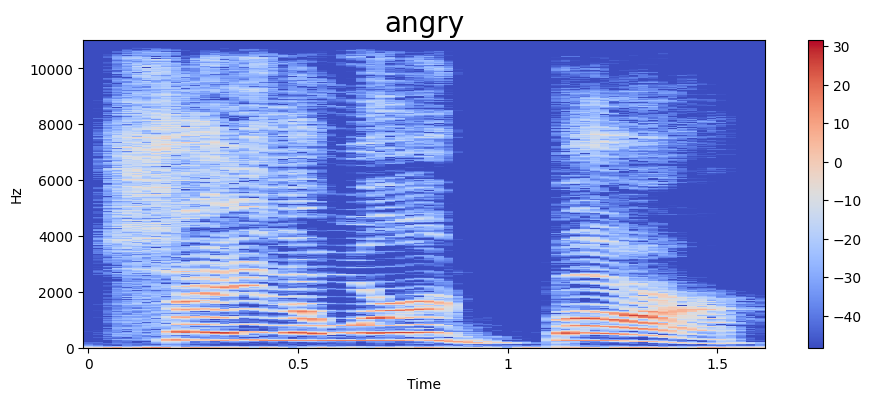

In [14]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

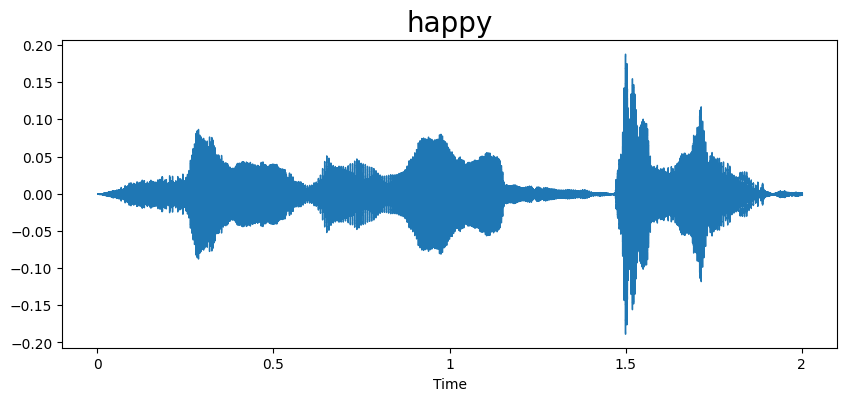

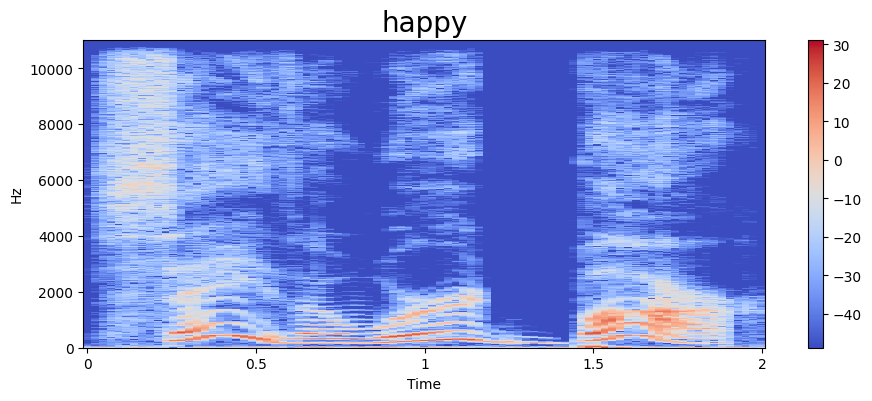

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

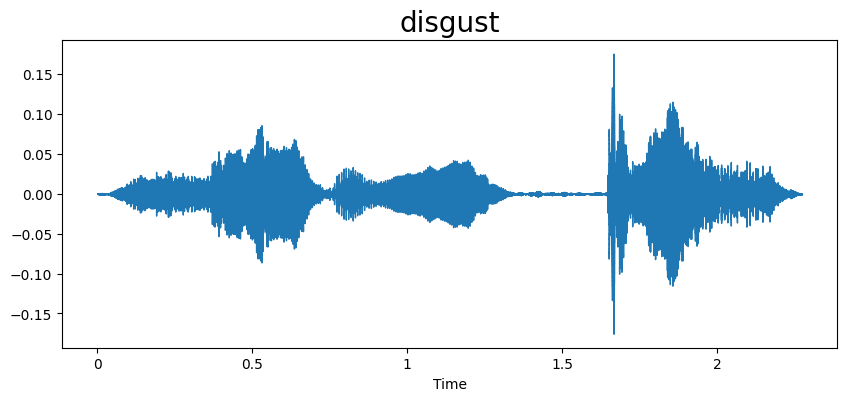

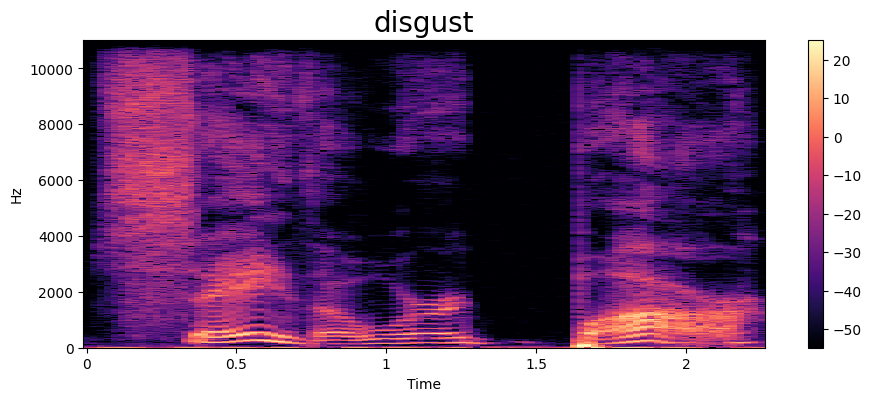

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

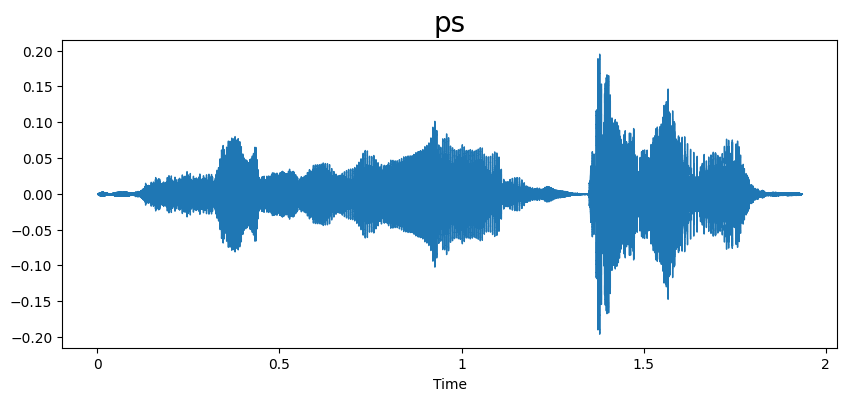

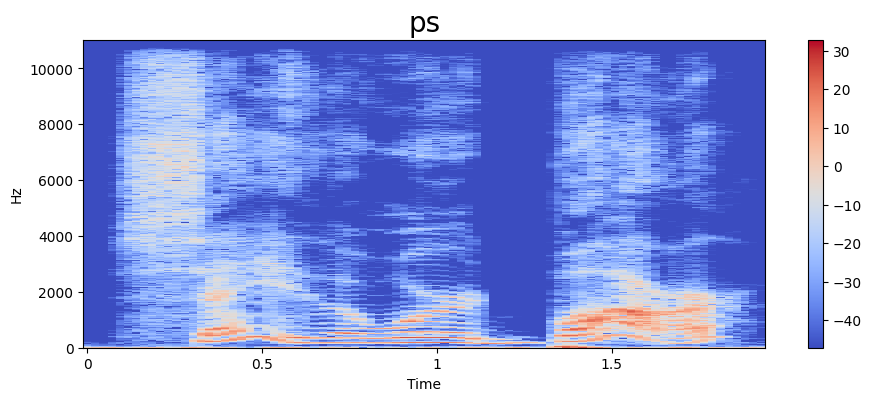

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

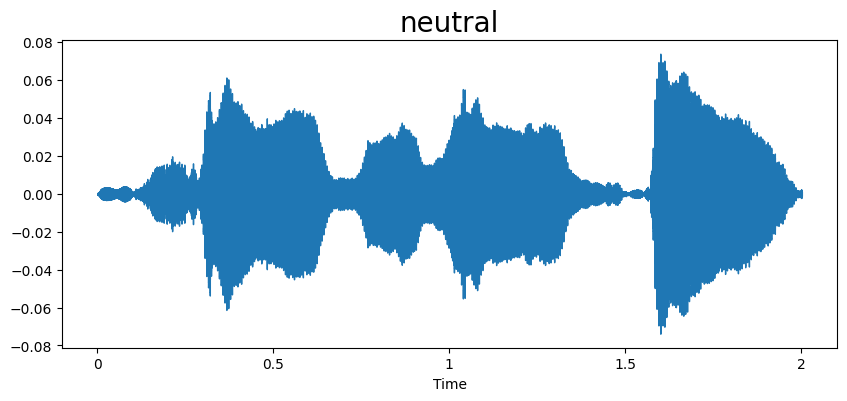

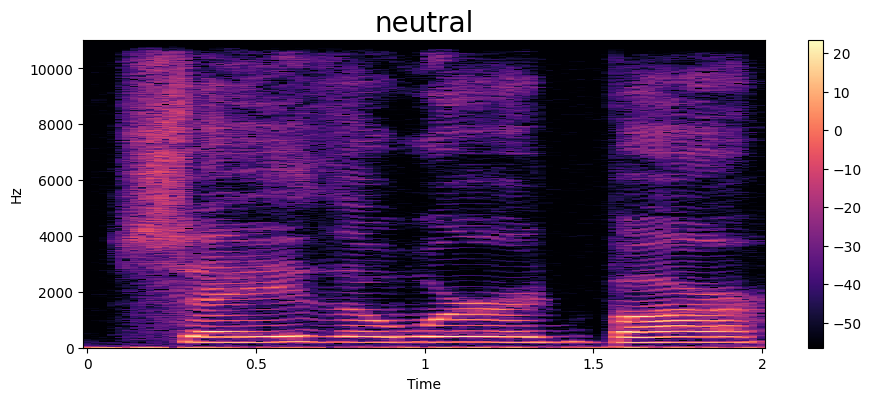

In [18]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

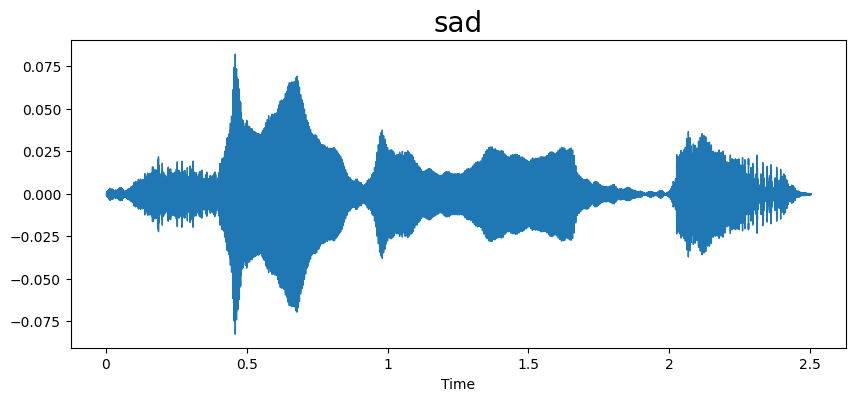

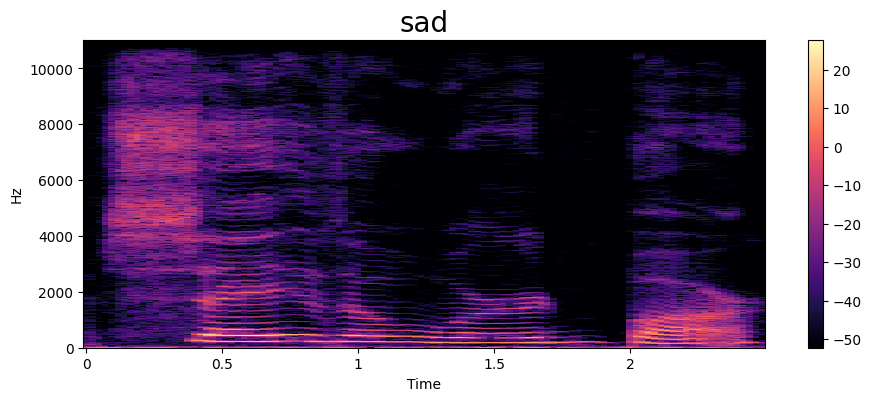

In [19]:

emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101454e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585308e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722104e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996327e+00, -1.82390726e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649140e+00],
      dtype=float32)

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550476, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.22003, 89.83577, 27.215466, 16.407124, 1...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572517, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261614, ...
Name: speech, Length: 2800, dtype: object

In [24]:
X_mfcc.value_counts().sum()

2800

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [28]:
y = y.toarray()

In [29]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
y.shape

(2800, 7)

In [32]:
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4688 - loss: 1.4603 - val_accuracy: 0.3893 - val_loss: 1.2072
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7694 - loss: 0.6081 - val_accuracy: 0.7429 - val_loss: 0.6585
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8930 - loss: 0.3240 - val_accuracy: 0.9054 - val_loss: 0.2734
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9313 - loss: 0.2363 - val_accuracy: 0.9607 - val_loss: 0.1349
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9598 - loss: 0.1401 - val_accuracy: 0.9179 - val_loss: 0.2149
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9645 - loss: 0.1166 - val_accuracy: 0.9179 - val_loss: 0.2618
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9678 - loss: 0.1144 - val_accuracy: 0.9857 - val_loss: 0.0590
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9836 - loss: 0.0656 - val_accuracy: 0.9429 - v

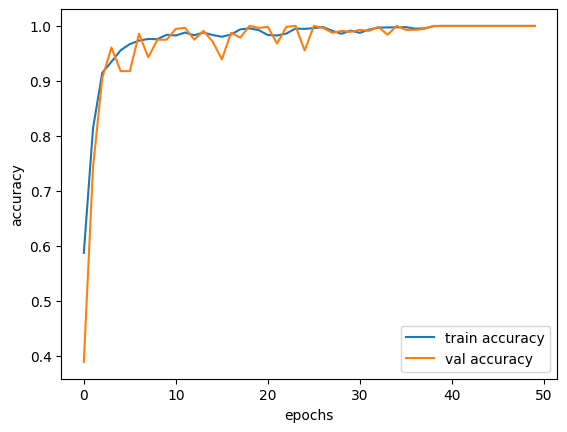

In [34]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

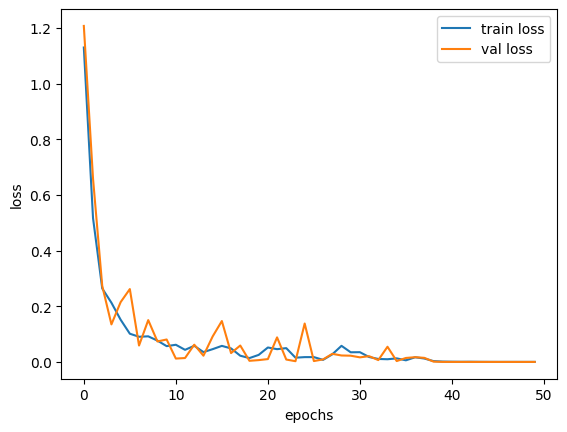

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
import pickle

In [37]:
filename='speech.pkl'

In [38]:
pickle.dump(df,open(filename,'wb'))

In [40]:
model=pd.read_pickle("speech.pkl")

In [41]:
df.head()

,speech,label
0,archive\TESS Toronto emotional speech set data...,angry
1,archive\TESS Toronto emotional speech set data...,angry
2,archive\TESS Toronto emotional speech set data...,angry
3,archive\TESS Toronto emotional speech set data...,angry
4,archive\TESS Toronto emotional speech set data...,angry


In [47]:
# Import necessary libraries
import numpy as np
import librosa
import soundfile
import pickle
import time

# Load the trained model
model_filename = "modelhybridEmotion.pkl"
with open(model_filename, 'rb') as file:
    ml_model = pickle.load(file)

# Define observed emotions
observed_emotions = ['calm', 'happy', 'fearful', 'disgust', 'neutral', 'angry', 'sad']

# Define stress levels based on emotions
stress_mapping = {
    "calm": "Low",
    "happy": "Low",
    "neutral": "Medium",
    "sad": "High",
    "angry": "Very High",
    "fearful": "High",
    "disgust": "Medium"
}

# Function to extract audio features
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        result = np.array([])

        if chroma:
            stft = np.abs(librosa.stft(X))
        
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        
        if chroma:
            chroma_feat = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma_feat))
        
        if mel:
            mel_feat = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel_feat))

    return result

# Function to predict emotion and stress level
def predict_emotion(file_name):
    start_time = time.time()  # Start measuring time

    features = extract_feature(file_name, mfcc=True, chroma=True, mel=True)
    features = features.reshape(1, -1)  # Reshape for model input
    
    prediction = ml_model.predict(features)[0]  # Predict emotion
    
    end_time = time.time()  # End time
    time_taken = round(end_time - start_time, 2)  # Compute time taken
    
    stress_level = stress_mapping.get(prediction, "Unknown")  # Assign stress level

    return {
        "predicted_emotion": prediction.capitalize(),
        "stress_level": stress_level,
        "time_taken": f"{time_taken} seconds"
    }

# Test with a sample file
test_file = "OAF_back_angry.wav"  # Replace with an actual audio file path
result = predict_emotion(test_file)

# Display results
print("Predicted Emotion:", result["predicted_emotion"])
print("Stress Level:", result["stress_level"])
print("Time Taken for Prediction:", result["time_taken"])


Predicted Emotion: Angry
Stress Level: Very High
Time Taken for Prediction: 0.02 seconds
